# Modern Olympics Data Visualizations Part 1

This study analyzed the historical data of Summer Olympics and tried to answer questions over four topics, i.e., how female participation changed over the years, whether there is a home-field advantage at the Olympics, what is the medal efficiency for each participating country and region, and which sports have the highest number of participants.

For each topic, its information will be presented with multiple visualizations, and these visualizations will then be evaluated to see whether it is the most appropriate and easy-to-read visualization in reader's perspective. Once the visualization is finalized, it will provide the answer to the main goals set in each topic.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline

## Topic 1.1: Female participation changed over the years
### <font color="darkred">*Main goal: Visualize female overall participation changes*</font>

In [42]:
#Filter data to summer
data = pd.read_csv('athlete_events.csv')
summer= data[data.Season=='Summer']
summer.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
219952,110491,Ana Cludia Trindade Araujo da Silva,F,16.0,150.0,37.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Uneven Bars,NaN
112099,56776,"Nikolaos ""Nikos"" Kaklamanakis",M,23.0,177.0,70.0,Greece,GRE,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Men's Windsurfer,NaN
95709,48452,Hans Hierzer,M,33.0,173.0,69.0,Austria,AUT,1988 Summer,1988,Summer,Seoul,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN
201818,101360,Julian Anthony Robertson,M,30.0,182.0,73.0,Great Britain-1,GBR,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Doubles,NaN
254642,127479,Chonlathorn Vorathamrong,F,20.0,166.0,50.0,Thailand,THA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 200 metres Backstroke,NaN


In [43]:
#Find unique year & NOC
unique_NOC = summer.NOC.unique()
unique_Year = summer.Year.unique()
unique_Year.sort()
unique_NOC.sort()
unique_Year

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016])

In [44]:
#Create list with male/female frequency
sex_list=[]
year_list=[]
frequencies_list=[]
for year in unique_Year:
    a = summer[summer.Year==year]
    frequencies_list.extend((len(a[a.Sex=='M']),(len(a[a.Sex=='F']))))
    sex_list.extend(('M','F'))
    year_list.extend((year,year))
sexpercentage_list = list(zip(year_list, sex_list,frequencies_list)) 
sexpercentage = pd.DataFrame(sexpercentage_list, columns = ['Year', 'Sex','Frequency'])
sexpercentage.head(5)

,Year,Sex,Frequency
0,1896,M,380
1,1896,F,0
2,1900,M,1903
3,1900,F,33
4,1904,M,1285


In [45]:
#Add percentage column into the list
unique_Year = sexpercentage.Year.unique()
Percentage_list=[]
for u in unique_Year:
    a=sexpercentage[sexpercentage.Year==u]
    f_total=sum(a["Frequency"])
    for row in a['Frequency']:
        Percentage_list.append(row/f_total)
sexpercentage['Percentage'] = Percentage_list
sexpercentage.tail(5)

,Year,Sex,Frequency,Percentage
53,2008,F,5816,0.427584
54,2012,M,7105,0.549923
55,2012,F,5815,0.450077
56,2016,M,7465,0.545368
57,2016,F,6223,0.454632


In [46]:
#Create line chart
alt.Chart(sexpercentage, title = 'Changes in female athletes participation in the Olympics (1896-2016)').mark_line(size=4
).encode(
    x=alt.X('Year',title='Year'),
    y= alt.Y('Percentage', axis=alt.Axis(format='%', title='Percentage')),
    color='Sex',
    tooltip=['Year','Percentage']
).interactive().properties(
    width=800,
    height=300).configure_title(
    fontSize=16).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)

alt.Chart(...)

<font size='3'>**We started with a simple line graph displaying both male and female athletes’ percentage against all athletes. The strength of line chart is that it is simple and clear. It shows that female percentage has been steadily growing in the past century at the Olympics. The drawback is that it does not generate a stark contrast between male and female as a stacked bar chart can do.**</font>

In [102]:
#Create bar chart
alt.Chart(sexpercentage, title = 'Changes in female athletes participation in the Olympics').mark_bar(size=4).encode(
    x=alt.X('sum(Frequency)', stack="normalize", axis=alt.Axis(format='%', title='Percentage')),
    y=alt.Y('Year',title='Year'),
    color=alt.Color('Sex'),
    tooltip=['Sex','Frequency']).interactive().properties(
    width=600,
    height=300).configure_title(
    fontSize=20).configure_axis(
    labelFontSize=16,
    titleFontSize=20
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    orient='top-left'
)

alt.Chart(...)

<font size='3'>**We then used stacked bar graphs. We first tried stacking the bar horizontally with percentage on the x-axis and time on y-axis.It was not as beautiful as wanted.** </font>

In [105]:
base=alt.Chart(sexpercentage).encode(x='year')

domain=["F","M"]
scl=["blue","grey"]
bar=alt.Chart(sexpercentage, title='Changes in female athletes participation in the Olympics (1896-2016)').mark_bar(size=10).encode(
    x=alt.X('Year',title='Year'),
    y=alt.Y('sum(Frequency):Q', stack="normalize", axis=alt.Axis(format='%', title='Percentage', grid=False)),
    color=alt.Color('Sex', scale=alt.Scale(domain=domain, range=scl)),order=alt.Order(
    'Sex',
    sort='ascending'),
    tooltip=['Year','Percentage'],
)



line= alt.Chart(sexpercentage[sexpercentage.Sex=="F"]).mark_line(point=True,color='red').encode(
    x=alt.X('Year',title='Year'),
    y='Percentage'
)
alt.layer(bar+line).properties(
    width=800,
    height=300).configure_title(
    fontSize=20).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)

alt.LayerChart(...)

<font size='3'>**So we tried to put it upright and replace the axis labels. To highlight the trend, we set the male section grey and the female part bright blue. We also drew a red line at the intersection of the two parts. This time, female participation was obviously highlighted and the trend shown very clearly.**</font>

In [108]:
alt.Chart(sexpercentage, title = 'Changes in female athletes participation in the Olympics (1896-2016)').mark_area().encode(
    x="Year:N",
    y="sum(Frequency):Q",
    color="Sex:N",
    tooltip=['Year','Percentage']
)

alt.Chart(...)

<font size='3'>**To also visualize how the total number of athletes participating in the Olympics changed over the century, we opted stacked area chart.**</font>

<font size='3'>**The x-axis denotes time and the y-axis number of athletes. Areas are made up of male and female participants. The two added up to the total number of athletes. This stacked area chart not only shows the changes in female participation, but also displays how the total number of athletes has been increasing over the years. The drawback is that area is not a much preferred visual encoding. As a result, the comparison of percentages of male and female is not very accurate. That said, we think its strengths outweigh its disadvantages.**

<font size='3' color="darkred">*KEY FINDING: Both the total number of participating athletes and the percentage of female athletes in the Olympics has been increase. Female participation started from 0% in Athens 1896 to 45% in Rio 2016.*</font>

----------------------------------------------------------------------------------------------------------------------

## Topic 1.2: Changes in female participation in each continent
### <font color="darkred">*Main goal: Visualize how each continent contributes to such changes*</font>

In [49]:
continent=pd.read_csv('continent.csv')
continent.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [50]:
continent_sp=continent[['Continent_Name','Three_Letter_Country_Code']]
continent_sp.rename(columns={'Three_Letter_Country_Code':'code_3'},inplace=True)
continent_sp.tail(5)

/Users/chrisfang/opt/anaconda3/envs/dviz/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Continent_Name,code_3
257,Africa,ZMB
258,Oceania,NaN
259,Asia,NaN
260,Asia,NaN
261,Asia,NaN


In [51]:
continent_4=pd.read_excel('continent_4.xlsx')
continent_4.rename(columns={'A-3':'code_3'},inplace=True)
continent_4_sp=continent_4[['249 countries','code_3','IOC']]
continent_4_sp.tail(5)

,249 countries,code_3,IOC
254,Wallis and Futuna Islands,WLF,WAF
255,Western Sahara,ESH,NaN
256,Yemen,YEM,YEM
257,Zambia,ZMB,ZAM
258,Zimbabwe,ZWE,ZIM


In [52]:
continent_merged=continent_4_sp.merge(continent_sp, on='code_3', how='left')
continent_merged.sample(4)

,249 countries,code_3,IOC,Continent_Name
85,El Salvador,SLV,ESA,North America
244,South Sudan,SSD,NaN,Africa
252,Islands,NaN,NaN,Asia
55,China,CHN,CHN,Asia


In [53]:
continent_merged.rename(columns={'IOC':'NOC'},inplace=True)
continent_merged.head()

,249 countries,code_3,NOC,Continent_Name
0,Afghanistan,AFG,AFG,Asia
1,Åland,ALA,NaN,Europe
2,Albania,ALB,ALB,Europe
3,Algeria,DZA,ALG,Africa
4,American Samoa,ASM,ASA,Oceania


In [54]:
summer_con=summer.merge(continent_merged,on='NOC',how='left')
summer_con.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,249 countries,code_3,Continent_Name
229003,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russian Federation,RUS,Europe
229004,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russian Federation,RUS,Asia
229005,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russian Federation,RUS,Europe
229006,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russian Federation,RUS,Asia
229007,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,BLR,Europe


In [55]:
summer_con_simple = summer_con[['Sex', 'Team','Year','Continent_Name']]
summer_con_simple.head()

,Sex,Team,Year,Continent_Name
0,M,China,1992,Asia
1,M,China,2012,Asia
2,M,Denmark,1920,Europe
3,M,Denmark/Sweden,1900,Europe
4,F,Netherlands,1932,Europe


In [56]:
summer_con_classified2=pd.crosstab(summer_con_simple.Year, [summer_con_simple.Sex,summer_con_simple.Continent_Name])
summer_con_classified2.tail()

Sex                 F                                                       M  \
Continent_Name Africa  Asia Europe North America Oceania South America Africa   
Year                                                                            
2000              327  1198   2718           808     473           237    665   
2004              300  1333   2787           794     375           295    598   
2008              365  1446   2870           793     383           348    577   
2012              382  1372   2958           782     368           340    574   
2016              409  1385   2897           900     420           520    657   

Sex                                                              
Continent_Name  Asia Europe North America Oceania South America  
Year                                                             
2000            1824   4324          1097     544           410  
2004            1725   4141           982     462           446  
2008            1884   3879          1035     450           454  
2012            1611   3648           850     428           468  
2016            1591   3526           916     449           731

In [57]:
summer_con_classified2['M', 'total'] = summer_con_classified2.iloc[:,0:12].sum(axis=1)
summer_con_classified2['M', 'female_percent']=summer_con_classified2.iloc[:,0:6].sum(axis=1)/summer_con_classified2['M', 'total'] 
summer_con_classified2.tail()

Sex                 F                                                       M  \
Continent_Name Africa  Asia Europe North America Oceania South America Africa   
Year                                                                            
2000              327  1198   2718           808     473           237    665   
2004              300  1333   2787           794     375           295    598   
2008              365  1446   2870           793     383           348    577   
2012              382  1372   2958           782     368           340    574   
2016              409  1385   2897           900     420           520    657   

Sex                                                                     \
Continent_Name  Asia Europe North America Oceania South America  total   
Year                                                                     
2000            1824   4324          1097     544           410  14625   
2004            1725   4141           982     462           446  14238   
2008            1884   3879          1035     450           454  14484   
2012            1611   3648           850     428           468  13781   
2016            1591   3526           916     449           731  14401   

Sex                            
Continent_Name female_percent  
Year                           
2000                 0.393915  
2004                 0.413260  
2008                 0.428404  
2012                 0.450040  
2016                 0.453510

In [58]:
summer_con_classified2['M','Africa_percent']=summer_con_classified2.iloc[:,0]/(summer_con_classified2.iloc[:,0]+
                                                                              summer_con_classified2.iloc[:,6])
summer_con_classified2['M','Asia_percent']=summer_con_classified2.iloc[:,1]/(summer_con_classified2.iloc[:,1]+
                                                                              summer_con_classified2.iloc[:,7])
summer_con_classified2['M','Europe_percent']=summer_con_classified2.iloc[:,2]/(summer_con_classified2.iloc[:,2]+
                                                                              summer_con_classified2.iloc[:,8])
summer_con_classified2['M','North America_percent']=summer_con_classified2.iloc[:,3]/(summer_con_classified2.iloc[:,3]+
                                                                              summer_con_classified2.iloc[:,9])
summer_con_classified2['M','Oceania_percent']=summer_con_classified2.iloc[:,4]/(summer_con_classified2.iloc[:,4]+
                                                                              summer_con_classified2.iloc[:,10])
summer_con_classified2['M','South America_percent']=summer_con_classified2.iloc[:,5]/(summer_con_classified2.iloc[:,5]+
                                                                              summer_con_classified2.iloc[:,11])
summer_con_classified2.tail()

Sex                 F                                                       M  \
Continent_Name Africa  Asia Europe North America Oceania South America Africa   
Year                                                                            
2000              327  1198   2718           808     473           237    665   
2004              300  1333   2787           794     375           295    598   
2008              365  1446   2870           793     383           348    577   
2012              382  1372   2958           782     368           340    574   
2016              409  1385   2897           900     420           520    657   

Sex                                                                     \
Continent_Name  Asia Europe North America Oceania South America  total   
Year                                                                     
2000            1824   4324          1097     544           410  14625   
2004            1725   4141           982     462           446  14238   
2008            1884   3879          1035     450           454  14484   
2012            1611   3648           850     428           468  13781   
2016            1591   3526           916     449           731  14401   

Sex                                                                       \
Continent_Name female_percent Africa_percent Asia_percent Europe_percent   
Year                                                                       
2000                 0.393915       0.329637     0.396426       0.385970   
2004                 0.413260       0.334076     0.435906       0.402281   
2008                 0.428404       0.387473     0.434234       0.425248   
2012                 0.450040       0.399582     0.459940       0.447775   
2016                 0.453510       0.383677     0.465390       0.451035   

Sex                                                                         
Continent_Name North America_percent Oceania_percent South America_percent  
Year                                                                        
2000                        0.424147        0.465093              0.366306  
2004                        0.447072        0.448029              0.398111  
2008                        0.433807        0.459784              0.433915  
2012                        0.479167        0.462312              0.420792  
2016                        0.495595        0.483314              0.415667

In [59]:
df=summer_con_classified2.drop(summer_con_classified2.iloc[:,0:12],axis=1,inplace=False)
df.head()

Sex                M                                             \
Continent_Name total female_percent Africa_percent Asia_percent   
Year                                                              
1896             380       0.000000            NaN          NaN   
1900            1932       0.016046            NaN          0.0   
1904            1300       0.012308            0.0          NaN   
1906            1695       0.006490            0.0          0.0   
1908            3019       0.015568            0.0          0.0   

Sex                                                                  \
Continent_Name Europe_percent North America_percent Oceania_percent   
Year                                                                  
1896                 0.000000              0.000000             0.0   
1900                 0.012528              0.059603             0.0   
1904                 0.000000              0.013605             0.0   
1906                 0.006905              0.000000             0.0   
1908                 0.018001              0.000000             NaN   

Sex                                   
Continent_Name South America_percent  
Year                                  
1896                             NaN  
1900                             0.0  
1904                             NaN  
1906                             NaN  
1908                             0.0

In [60]:
df_new = df.xs('M', axis=1, drop_level=True)
df_new.tail()

Continent_Name,total,female_percent,Africa_percent,Asia_percent,Europe_percent,North America_percent,Oceania_percent,South America_percent
Year,,,,,,,,
2000,14625,0.393915,0.329637,0.396426,0.385970,0.424147,0.465093,0.366306
2004,14238,0.413260,0.334076,0.435906,0.402281,0.447072,0.448029,0.398111
2008,14484,0.428404,0.387473,0.434234,0.425248,0.433807,0.459784,0.433915
2012,13781,0.450040,0.399582,0.459940,0.447775,0.479167,0.462312,0.420792
2016,14401,0.453510,0.383677,0.465390,0.451035,0.495595,0.483314,0.415667


In [61]:
df2=df_new.drop(df_new.iloc[:,0:1],axis=1,inplace=False)

In [62]:
df2.tail()

Continent_Name,female_percent,Africa_percent,Asia_percent,Europe_percent,North America_percent,Oceania_percent,South America_percent
Year,,,,,,,
2000,0.393915,0.329637,0.396426,0.385970,0.424147,0.465093,0.366306
2004,0.413260,0.334076,0.435906,0.402281,0.447072,0.448029,0.398111
2008,0.428404,0.387473,0.434234,0.425248,0.433807,0.459784,0.433915
2012,0.450040,0.399582,0.459940,0.447775,0.479167,0.462312,0.420792
2016,0.453510,0.383677,0.465390,0.451035,0.495595,0.483314,0.415667


In [63]:
df3=df2.reset_index(inplace=False)
df3.head()

Continent_Name,Year,female_percent,Africa_percent,Asia_percent,Europe_percent,North America_percent,Oceania_percent,South America_percent
0,1896,0.000000,NaN,NaN,0.000000,0.000000,0.0,NaN
1,1900,0.016046,NaN,0.0,0.012528,0.059603,0.0,0.0
2,1904,0.012308,0.0,NaN,0.000000,0.013605,0.0,NaN
3,1906,0.006490,0.0,0.0,0.006905,0.000000,0.0,NaN
4,1908,0.015568,0.0,0.0,0.018001,0.000000,NaN,0.0


In [64]:
df3.columns = ['Year', 'Global', 'Africa', 'Asia', 'Europe','N_America','Oceania','S_America']
df3_tidy=pd.melt(df3,id_vars=['Year'],var_name='Continent',value_name='Percentage')
df3_tidy.sample(5)

,Year,Continent,Percentage
56,2012,Africa,0.399582
174,1896,S_America,NaN
194,1984,S_America,0.133333
51,1992,Africa,0.223416
118,1904,N_America,0.013605


In [65]:
alt.Chart(df3_tidy, title='How did the percentage of female athelets change for each continent?').mark_line().encode(
    x='Year',
    y=alt.Y('Percentage',title='Female Percentage'),
    color='Continent'
).properties(
    width=800,
    height=300).configure_title(
    fontSize=16).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)

alt.Chart(...)

<font size='3'>**To visualize changes in female participation in each continent, we first used a simple line graph where we put all the continent together. The x-axis is time, and the y-axis is female participation. The legend shows the colors associated with the continents.**

<font size='3'>**The graph was very messy. As there were six continents and one global average, we could not distinguish between the seven categories very easily.**</font>

<Figure size 2160x2160 with 0 Axes>

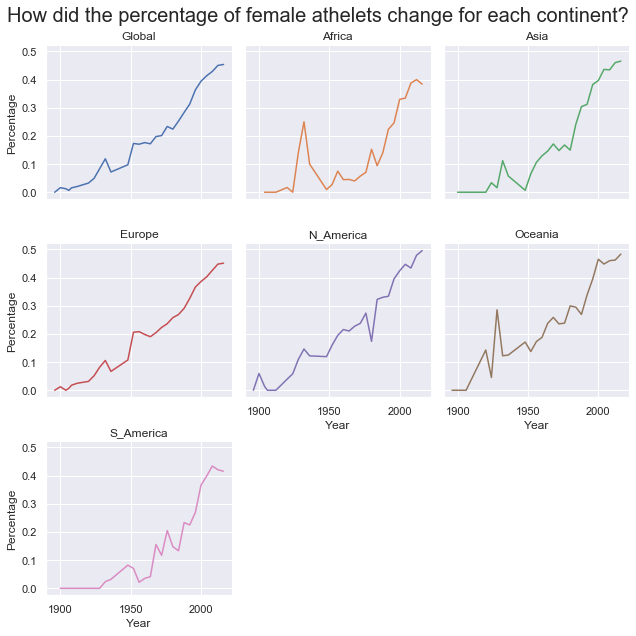

In [66]:
plt.figure(figsize=(30,30))
sns.set()
# Create a grid : initialize it
g = sns.FacetGrid(df3_tidy, col='Continent', hue='Continent', col_wrap=3, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'Percentage').set_titles("{col_name} Continent")

# Control the title of each facet
g = g.set_titles("{col_name}")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('How did the percentage of female athelets change for each continent?', fontsize=20)

<font size='3'>**Then we tried a small multiple in which each continent and the global average were shown in simple line graphs. This chart showed every continent clearly but it was not very easy to make comparison.**</font>

In [67]:
alt.Chart(df3_tidy, title='How did the percentage of female athelets change for each continent?').transform_filter(
    alt.datum.symbol != 'GOOG'
).mark_area().encode(
    x='Year:N',
    y='Percentage:Q',
    color='Continent:N',
    row=alt.Row('Continent:N')
).properties(height=100, width=350).configure_title(
    fontSize=16).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)


alt.Chart(...)

<font size='3'>**To make comparisons clearer, we decided to use area chart. We stacked each area chart each representing a continent along a vertical line.**</font>

<font size='3'>**Comparisons were still difficult. Most importantly, in terms of using color as the visual encoding, this graph has too many categories. Besides, it has red and green at the same time, and therefore is not accessible to colorblind populations.**</font>

In [68]:
df4=df3
df4.columns = ['Year', 'All','Africa','Asia','Europe','N_America','Oceania','S_America']
df4.head()


,Year,All,Africa,Asia,Europe,N_America,Oceania,S_America
0,1896,0.000000,NaN,NaN,0.000000,0.000000,0.0,NaN
1,1900,0.016046,NaN,0.0,0.012528,0.059603,0.0,0.0
2,1904,0.012308,0.0,NaN,0.000000,0.013605,0.0,NaN
3,1906,0.006490,0.0,0.0,0.006905,0.000000,0.0,NaN
4,1908,0.015568,0.0,0.0,0.018001,0.000000,NaN,0.0


Text(0.5, 0.98, 'How did the percentage of female athelets change for each continent?')

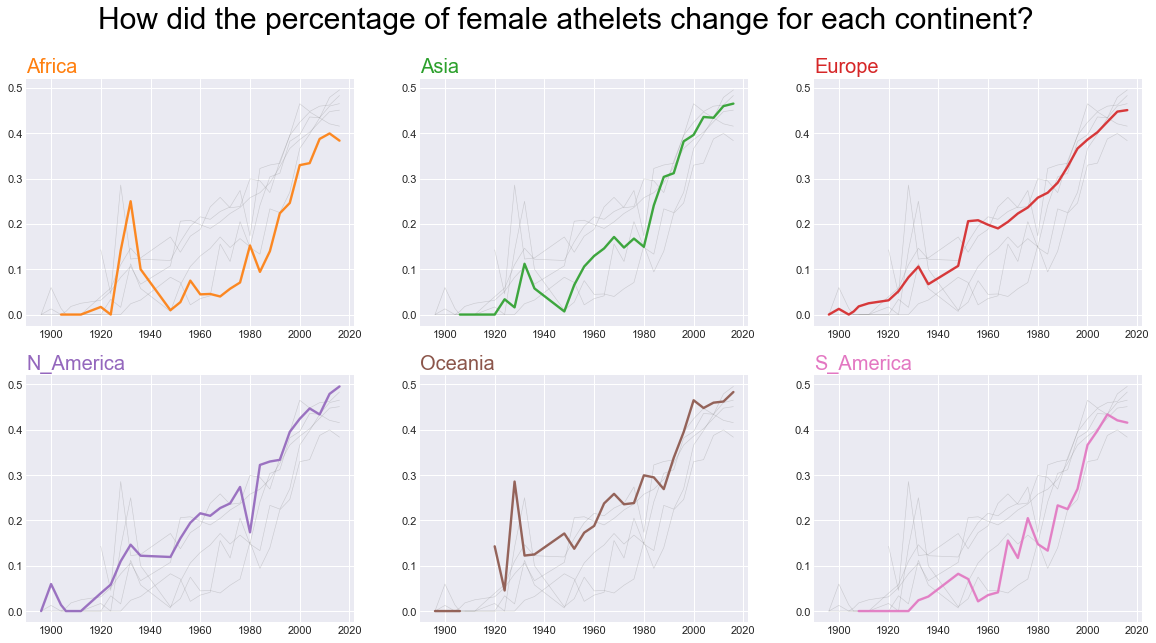

In [69]:

plt.figure(figsize=(20,10))

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab10')
 
# multiple line plot
num=0
for column in df4.drop(['Year', 'All'], axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every groups, but discreet
    for v in df4.drop(['Year', 'All'], axis=1):
        plt.plot(df4['Year'], df4[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df4['Year'], df3[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 

    # Add title
    plt.title(column, loc='left', fontsize=20, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("How did the percentage of female athelets change for each continent?", fontsize=30, fontweight=3, color='black', style='normal')



<font size='3'>**We then went back to small multiple. Since we cared about the comparison between each continent, we decided to plot every continent and the global average in each of the six graphs. We highlighted only one continent in each graph, and set all other continents grey in the background.**</font>

<font size='3'>**It worked much better than the earlier attempts, but one drawback is that it did not allow comparison with the global average.**</font>

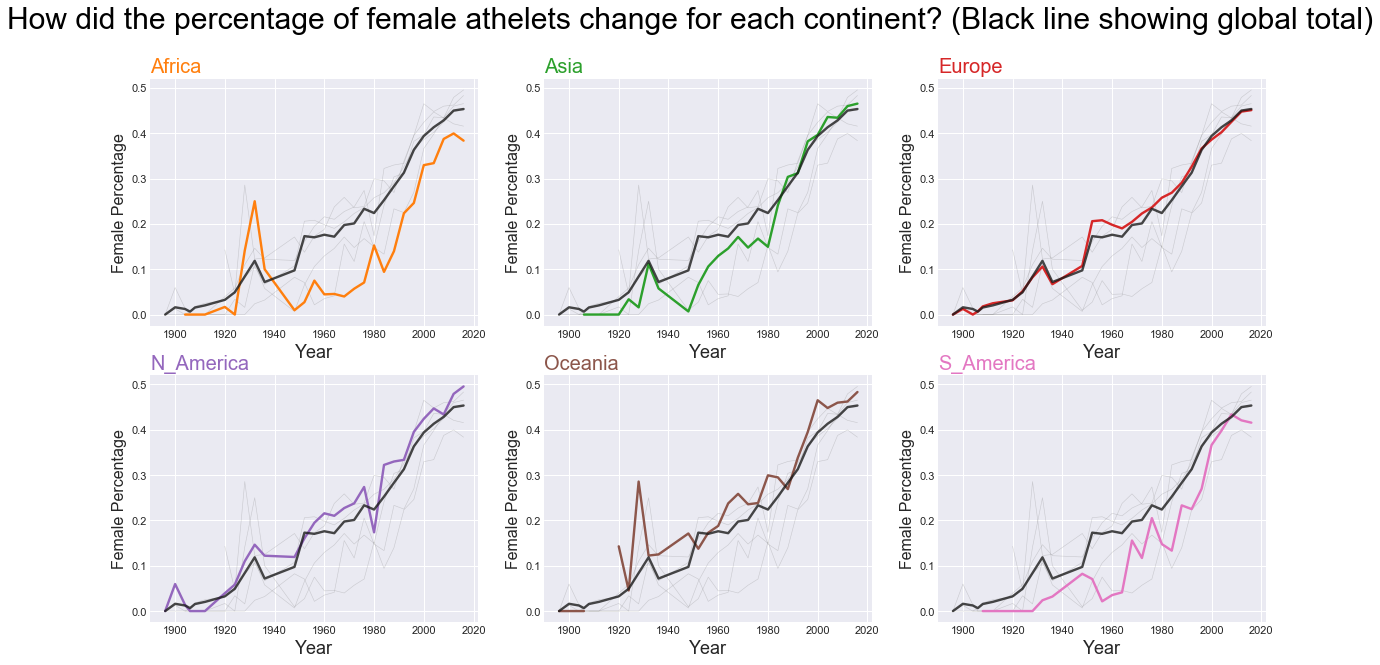

In [71]:
plt.figure(figsize=(20,10))

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab10')
 
# multiple line plot
num=0
for column in df4.drop(['Year', 'All'], axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every groups, but discreet
    for v in df4.drop(['Year', 'All'], axis=1):
        plt.plot(df4['Year'], df4[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df4['Year'], df3[column], marker='', color=palette(num), linewidth=2.4, alpha=1, label=column)
    plt.plot(df4['Year'], df4['All'], marker='', color='k', linewidth=2.4,alpha=0.8)

    # Add title
    plt.title(column, loc='left', fontsize=20, fontweight=0, color=palette(num) )
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Female Percentage', fontsize=16,rotation=90)
 
# general title
plt.suptitle("How did the percentage of female athelets change for each continent? (Black line showing global total)", fontsize=30, fontweight=3, color='black', style='normal')

plt.savefig('g-2-6')


<font size='3'>**Finally, we decided to highlight the global average with a black line. This time, comparisons both between continents and with the global average are clear.**</font>

<font size='3' color="darkred">*KEY FINDING: The growth in the rate of participation of women various across continents. The rate in Africa has always been lower than the global average except for during the 1930s. The rate in Asia and South America had also been always lower than the global average but caught up during the 1980s and 2000s, respectively. The rate in Europe, North America and Oceania has always been the same as or higher than the global mean.*</font>